In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
imgL = cv2.imread( "./test_images/imgl.jpg" )
imgR = cv2.imread( "./test_images/imgr.jpg" )

In [3]:
stereo = cv2.StereoBM_create( numDisparities=16, blockSize=15 )
imgL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

In [4]:
stereo.setNumDisparities(16)
stereo.setBlockSize(15)
#stereo.setPreFilterType(1)
#stereo.setPreFilterSize(25) #2 - 25
#stereo.setPreFilterCap(32)  #5 - 62
#stereo.setTextureThreshold(60) #10 - 100
#stereo.setUniquenessRatio(15)  #15 - 100
#stereo.setSpeckleRange(50)     #0 - 100
#stereo.setSpeckleWindowSize(12)#3 - 25
#stereo.setDisp12MaxDiff(15)    #5 - 25
#stereo.setMinDisparity(25)     #5 - 25

In [5]:
disparity = stereo.compute( imgL, imgR )

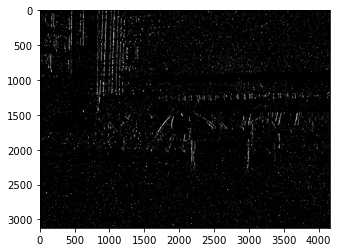

In [6]:
plt.imshow( disparity, "gray" )
plt.show()

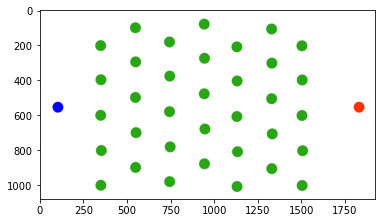

In [7]:
globalMap = cv2.imread( "./upload_dir/b3898d0e-ea1c-434b-b9b5-f354cead4217.jpg" )
plt.imshow( globalMap )

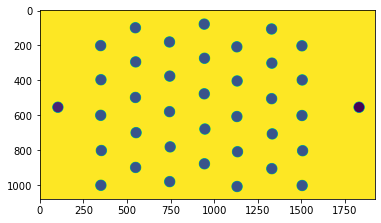

In [9]:
gray = cv2.cvtColor( globalMap, cv2.COLOR_BGR2GRAY )
plt.imshow(gray)

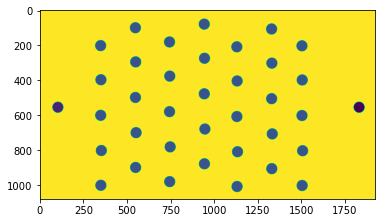

In [35]:
# detect circles
gray_blured = cv2.blur( gray, (3, 3) )
plt.imshow( gray_blured )

In [53]:
obstacles = []
index     = 0
import numpy as np
detected_circles = cv2.HoughCircles( gray_blured, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=1, maxRadius=40 )
if detected_circles is not None:
    detected_circles = np.uint16( np.around( detected_circles ) )
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
        pos = (a, b)
        
        # border outline
        cv2.circle( globalMap, center=(a, b), radius=r, color=( 0, 0, 0 ), thickness=1 )
        obstacles.append( {
            "x" : a,
            "y" : b,
            "r" : r
        } )
        
        # create labels
        cv2.putText(globalMap, text=str(index), org=(a,b),
            fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0,0,0),
            thickness=2, lineType=cv2.LINE_AA)
        
        index+=1

## Show Map

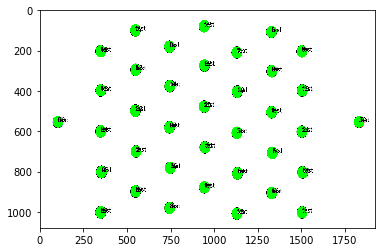

In [71]:
# show cirlces tracking
plt.imshow( globalMap, interpolation='nearest', aspect='auto' )

In [72]:
import pandas as pd
df = pd.DataFrame( obstacles )
df

,x,y,r
0,742,182,31
1,1502,1002,31
2,550,700,31
3,1128,608,31
4,1326,506,31
5,1326,108,31
6,546,100,31
7,1128,210,31
8,744,980,31
9,1500,204,31


In [73]:
print( obstacles[0] )

{'x': 742, 'y': 182, 'r': 31}


In [74]:
def get_coordinate( index ):
    try:
        return obstacles[ index ]
    except IndexError:
        return {}

In [75]:
coord = get_coordinate(2)
print( coord )

{'x': 550, 'y': 700, 'r': 31}
